In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from os.path import isdir, join, isfile

In [5]:
import datetime
import pandas as pd
import seaborn as sns

In [93]:
dir_run1 = "../data/tests_performance/N128_OMP16_32nodes_bp4"
dir_run2 = "../data/tests_performance/N128_OMP16_32nodes_2node"
dir_run3 = "../data/tests_performance/N128_OMP16_32node_3node_v3"

assert(isdir(dir_run1))
assert(isdir(dir_run2))
assert(isdir(dir_run3))

In [94]:
logfile_run1 = join(dir_run1, "delta.log")
logfile_run2 = join(dir_run2, "delta.log")
logfile_run3 = join(dir_run3, "delta.log")

assert(isfile(logfile_run1))
assert(isfile(logfile_run2))
assert(isfile(logfile_run3))

In [95]:
columns = ["time_log", "tidx", "time_fft", "mode"]

dframe = pd.DataFrame(columns=columns)

In [96]:
with open(logfile_run1, "r") as df:
    l0 = df.readline()
    splits = l0.split()
    # There is a , that needs to be removed
    fix_mus = splits[2].replace(",", ".", 1)
    fix_mus = fix_mus.replace(",", "")
    toff_run2 = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 

    for line in df:
        if "FFT took" in line:
            splits = line.split()
            fix_mus = splits[2].replace(",", ".", 1)
            fix_mus = fix_mus.replace(",", "")
            time_log = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 
            tidx = int(splits[10][:-1])
            time_fft = float(splits[13][:-1])
            
            
            new_row = {"time_log": time_log - toff_run2, "tidx":int(splits[10][:-1]), 
                       "time_fft": datetime.timedelta(seconds=float(splits[13][:-1])),
                       "mode": "bp4"}
            dframe = dframe.append(new_row, ignore_index=True)

In [97]:
with open(logfile_run2, "r") as df:
    l0 = df.readline()
    splits = l0.split()
    # There is a , that needs to be removed
    fix_mus = splits[2].replace(",", ".", 1)
    fix_mus = fix_mus.replace(",", "")
    toff_run1 = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 

    for line in df:
        if "FFT took" in line:
            splits = line.split()
            fix_mus = splits[2].replace(",", ".", 1)
            fix_mus = fix_mus.replace(",", "")
            time_log = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 
            tidx = int(splits[10][:-1])
            time_fft = float(splits[13][:-1])
            
            
            new_row = {"time_log": time_log - toff_run1, "tidx":int(splits[10][:-1]), 
                       "time_fft": datetime.timedelta(seconds=float(splits[13][:-1])),
                       "mode": "2node"}
            dframe = dframe.append(new_row, ignore_index=True)

In [98]:
with open(logfile_run3, "r") as df:
    l0 = df.readline()
    splits = l0.split()
    print(splits)
    # There is a , that needs to be removed
    fix_mus = splits[2].replace(",", ".", 1)
    fix_mus = fix_mus.replace(",", "")
    toff_run3 = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 
    
    for line in df:
        if "FFT took" in line:
            splits = line.split()
            fix_mus = splits[2].replace(",", ".", 1)
            fix_mus = fix_mus.replace(",", "")
            time_log = datetime.datetime.strptime(splits[1] + " " + fix_mus, "%Y-%m-%d %H:%M:%S.%f") 
            tidx = int(splits[10][:-1])
            time_fft = float(splits[13][:-1])
            print(splits, time_fft)
            
            
            new_row = {"time_log": time_log - toff_run3, "tidx":int(splits[10][:-1]), 
                       "time_fft": datetime.timedelta(seconds=float(splits[13][:-1])),
                       "mode": "3node"}
            dframe = dframe.append(new_row, ignore_index=True)

['INFO', '2020-05-27', '04:04:09,542,542', '[Process', '12340', 'MainProcess', 'MainThread]', '[processor_mpi_tasklist', 'main]:', 'Starting', 'run', 'ABC125']
['INFO', '2020-05-27', '04:04:31,221,221', '[Process', '12340', 'MainProcess', 'Thread-3]', '[tasks_mpi', 'submit]:', 'tidx', '2:', 'FFT', 'took', '1.0578s'] 1.0578
['INFO', '2020-05-27', '04:04:31,406,406', '[Process', '12340', 'MainProcess', 'Thread-1]', '[tasks_mpi', 'submit]:', 'tidx', '0:', 'FFT', 'took', '1.3128s'] 1.3128
['INFO', '2020-05-27', '04:04:31,682,682', '[Process', '12340', 'MainProcess', 'Thread-2]', '[tasks_mpi', 'submit]:', 'tidx', '1:', 'FFT', 'took', '1.5513s'] 1.5513
['INFO', '2020-05-27', '04:04:32,591,591', '[Process', '12340', 'MainProcess', 'Thread-3]', '[tasks_mpi', 'submit]:', 'tidx', '4:', 'FFT', 'took', '1.1468s'] 1.1468
['INFO', '2020-05-27', '04:04:33,757,757', '[Process', '12340', 'MainProcess', 'Thread-4]', '[tasks_mpi', 'submit]:', 'tidx', '3:', 'FFT', 'took', '3.5642s'] 3.5642
['INFO', '2020-

['INFO', '2020-05-27', '04:04:56,808,808', '[Process', '12340', 'MainProcess', 'Thread-3]', '[tasks_mpi', 'submit]:', 'tidx', '220:', 'FFT', 'took', '0.7488s'] 0.7488
['INFO', '2020-05-27', '04:04:56,970,970', '[Process', '12340', 'MainProcess', 'Thread-1]', '[tasks_mpi', 'submit]:', 'tidx', '221:', 'FFT', 'took', '0.8927s'] 0.8927
['INFO', '2020-05-27', '04:04:57,214,214', '[Process', '12340', 'MainProcess', 'Thread-2]', '[tasks_mpi', 'submit]:', 'tidx', '222:', 'FFT', 'took', '1.0303s'] 1.0303
['INFO', '2020-05-27', '04:04:57,437,437', '[Process', '12340', 'MainProcess', 'Thread-4]', '[tasks_mpi', 'submit]:', 'tidx', '223:', 'FFT', 'took', '1.0478s'] 1.0478
['INFO', '2020-05-27', '04:04:57,870,870', '[Process', '12340', 'MainProcess', 'Thread-3]', '[tasks_mpi', 'submit]:', 'tidx', '229:', 'FFT', 'took', '0.9144s'] 0.9144
['INFO', '2020-05-27', '04:04:58,028,28', '[Process', '12340', 'MainProcess', 'Thread-2]', '[tasks_mpi', 'submit]:', 'tidx', '239:', 'FFT', 'took', '0.8076s'] 0.8076

['INFO', '2020-05-27', '04:05:08,569,569', '[Process', '12340', 'MainProcess', 'Thread-4]', '[tasks_mpi', 'submit]:', 'tidx', '354:', 'FFT', 'took', '0.8726s'] 0.8726
['INFO', '2020-05-27', '04:05:08,687,687', '[Process', '12340', 'MainProcess', 'Thread-3]', '[tasks_mpi', 'submit]:', 'tidx', '355:', 'FFT', 'took', '0.8653s'] 0.8653
['INFO', '2020-05-27', '04:05:08,924,924', '[Process', '12340', 'MainProcess', 'Thread-2]', '[tasks_mpi', 'submit]:', 'tidx', '359:', 'FFT', 'took', '0.7991s'] 0.7991
['INFO', '2020-05-27', '04:05:09,026,26', '[Process', '12340', 'MainProcess', 'Thread-1]', '[tasks_mpi', 'submit]:', 'tidx', '360:', 'FFT', 'took', '0.7764s'] 0.7764
['INFO', '2020-05-27', '04:05:09,316,316', '[Process', '12340', 'MainProcess', 'Thread-4]', '[tasks_mpi', 'submit]:', 'tidx', '361:', 'FFT', 'took', '0.7417s'] 0.7417
['INFO', '2020-05-27', '04:05:09,659,659', '[Process', '12340', 'MainProcess', 'Thread-3]', '[tasks_mpi', 'submit]:', 'tidx', '362:', 'FFT', 'took', '0.9638s'] 0.9638

In [103]:
dframe[dframe["mode"] == "2node"]

,time_log,tidx,time_fft,mode
500,00:00:16.251558,2,00:00:01.353000,2node
501,00:00:16.414415,0,00:00:01.621000,2node
502,00:00:17.445446,1,00:00:02.603200,2node
503,00:00:17.804805,4,00:00:00.634100,2node
504,00:00:19.532533,3,00:00:04.580800,2node
...,...,...,...,...
813,00:01:35.656657,494,00:00:00.802700,2node
814,00:01:35.780781,495,00:00:00.802800,2node
815,00:01:36.102102,497,00:00:00.775700,2node
816,00:01:36.347348,498,00:00:00.833600,2node


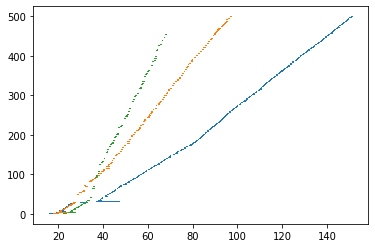

In [74]:
fig, ax = plt.subplots()

for index, row in dframe.iterrows():
    toff = row.time_log.seconds + row.time_log.microseconds * 1e-6
    tdelta = row.time_fft.seconds + row.time_fft.microseconds * 1e-6

    fc = None
    if row["mode"] == "bp4":
        fc = "C0"        
    elif row["mode"] == "2node":
        fc = "C1"
    elif row["mode"] == "3node":
        fc = "C2"
    
    ax.broken_barh([(toff, tdelta)], (row.tidx, 1), facecolors=fc)

In [75]:
dframe["time_fft_secs"] = dframe["time_fft"].apply(lambda x: x.seconds + x.microseconds * 1e-6)

In [102]:
dframe["time_fft"]

0      00:00:01.237000
1      00:00:01.514600
2      00:00:01.849800
3      00:00:01.073900
4      00:00:00.783600
             ...      
999    00:00:00.704900
1000   00:00:01.022100
1001   00:00:00.818000
1002   00:00:00.768200
1003   00:00:00.988500
Name: time_fft, Length: 1004, dtype: timedelta64[ns]

[Text(0, 0, 'file'), Text(0, 0, '2-node'), Text(0, 0, '3-node')]

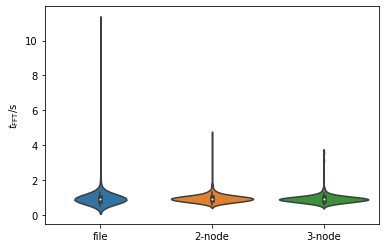

In [76]:


ax = sns.violinplot(x="mode", y="time_fft_secs", data=dframe)
ax.set(ylabel=r"$t_{\mathrm{FFT}} / \mathrm{s}$", xlabel="")
ax.set_xticklabels(["file", "2-node", "3-node"])

In [104]:
ll = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 40, 41, 42, 47, 59, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 98, 99, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 119, 126, 127, 128, 132, 133, 142, 143, 144, 151, 152, 153, 154, 155, 163, 168, 169, 170, 175, 176, 177, 178, 183, 187, 188, 191, 192, 198, 199, 200, 202, 203, 208, 209, 215, 216, 217, 222, 227, 232, 233, 234, 239, 240, 242, 243, 244, 249, 250, 251, 257, 258, 259, 260, 265, 266, 267, 275, 276, 277, 283, 284, 285, 286, 288, 289, 290, 300, 302, 303, 310, 311, 313, 314, 319, 320, 321, 323, 328, 337, 339, 340, 341, 342, 343, 344, 345, 351, 352, 353, 363, 367, 368, 369, 370, 371, 376, 381, 386, 388, 392, 393, 394, 400, 401, 410, 411, 412, 413, 419, 420, 422, 436, 437, 438, 440, 441, 446, 451] 

In [105]:
len(ll)

193